In [7]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
def get_list_of_days(start, end):
    start = datetime.datetime.strptime(start, "%Y-%m-%d")
    end = datetime.datetime.strptime(end, "%Y-%m-%d")
    return (start + datetime.timedelta(days=x) for x in range(0, (end-start).days))

In [9]:
date_start = '2020-01-07'
date_end = '2020-01-13'
days = get_list_of_days(date_start, date_end)
days = list(map(lambda d: d.strftime("%Y-%m-%d"), days))

path = '../data/{}.csv'
id_status = 1007

In [10]:
def get_days_work_time_for_module(id_module=0):
    global days
    work_time = []
    if id_module != 0:
        for day in days:
            path_data = path.format(day)
            try:
                db = pd.read_csv(path_data)
                db_work = db[(db.id_module == id_module) & (db.id_status == id_status)]
                db_work.drop(['id_module', 'id_status', 'time'], axis=1, inplace=True)
                db_work['onoff'] = db_work['value'].apply(lambda val: int(val.split(',')[4]))
                work_time.append((day, db_work['onoff'].sum()))
            except:
                print("Błąd odczytu: {}".format(path_data))
    else:
        print("Blad id")
    return work_time

/home/marcin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


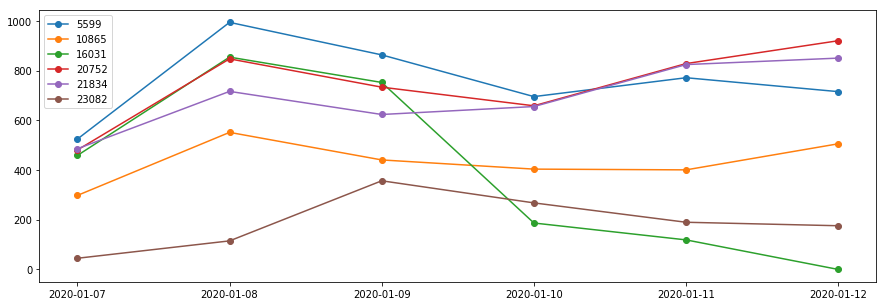

In [11]:
mean_work = []
id_mod = (5599, 10865, 16031, 20752, 21834, 23082)
plt.figure(figsize=(15, 5))
for id in id_mod:
    days_work = get_days_work_time_for_module(id)
    x = [d[0] for d in days_work]
    y = [t[1] for t in days_work]
    mean_work.append(np.mean(y))
    plt.plot(x, y, 'o-', label=id)
plt.legend()
plt.show()

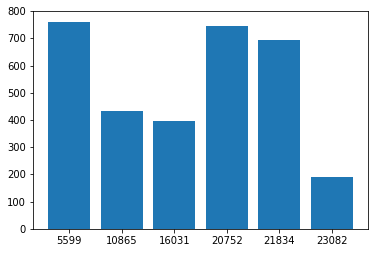

In [6]:
x = len(id_mod)
plt.bar(range(x), mean_work)
plt.xticks(range(x), id_mod)
plt.show()